In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import pylab
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('coursework_1_data_2019.csv')
df.describe()
# print(df.columns.values)

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,152.000000,152.000000,152.00000,152.000000,152.000000,152.00000,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1075.296053,1159.513158,1278.605263,3.409223e+05,3.542821e+05,3.682895e+05,375.796053,401.526316,438.276316,166914.75000,171990.611842,177176.980263,699.50000,757.986842,840.328947,174007.565789,182291.480263,191112.500000,2.703092e+05,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579
std,922.378705,997.231047,1069.691997,2.621354e+05,2.788745e+05,2.945969e+05,323.560804,353.756510,376.478018,128635.27204,136886.259551,145624.858528,605.75565,654.418340,703.887519,133527.499451,142585.690264,149675.481541,2.104618e+05,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607
min,5.000000,1.000000,4.000000,2.200000e+03,2.385000e+03,2.440000e+03,2.000000,0.000000,1.000000,1085.00000,1305.000000,1426.000000,3.00000,1.000000,3.000000,1115.000000,1080.000000,1014.000000,2.000000e+03,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,493.500000,531.750000,592.500000,1.894748e+05,1.880672e+05,1.934285e+05,175.750000,183.250000,198.250000,93000.25000,90270.500000,91086.500000,305.00000,329.500000,372.750000,95983.750000,99307.250000,101902.750000,1.400000e+05,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000
50%,729.000000,794.500000,873.500000,2.540925e+05,2.577715e+05,2.642035e+05,266.000000,271.000000,293.500000,122694.00000,121755.000000,121868.000000,460.50000,532.000000,570.500000,128675.500000,135104.000000,140668.500000,2.000000e+05,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000
75%,1386.000000,1470.250000,1641.500000,3.751225e+05,4.024990e+05,4.094285e+05,473.750000,519.250000,554.750000,183610.00000,189826.000000,194432.750000,886.50000,957.000000,1043.000000,191395.500000,197497.750000,213147.750000,3.017500e+05,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000
max,5065.000000,5582.000000,5745.000000,1.411380e+06,1.528154e+06,1.623387e+06,1762.000000,2065.000000,2000.000000,694681.00000,754646.000000,790860.000000,3303.00000,3517.000000,3745.000000,716699.000000,773508.000000,832527.000000,1.170000e+06,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000


Calculate the percentage of condition.

In [3]:
year=['2008', '2013', '2018']
# df['avg_cases_total'] = (df['2008_cases_total'] + df['2013_cases_total'] + df['2018_cases_total'])/3
for i in year:
    df[i + '_%_total'] = list((df[i+'_cases_total']/df[i+'_pop_total'])*100)
    #df[i + '_%_male'] = list((df[i + '_cases_male'] / df[i + '_pop_male']) * 100)
    #df[i + '_%_female'] = list((df[i + '_cases_female'] / df[i + '_pop_female']) * 100)

df['08-13_%_increase'] = ((df['2013_%_total']-df['2008_%_total'])/df['2008_%_total'])*100
df['13-18_%_increase'] = ((df['2018_%_total']-df['2013_%_total'])/df['2013_%_total'])*100
df['avg_%_increase'] = (df['08-13_%_increase']+df['13-18_%_increase'])/2

Calculate the buget per person.

In [4]:
# budget = ['total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness','media_awareness','sub_counselling']
# for j in budget:
#     df[j + '/person'] = list(df[j]/df['avg_cases_total'])


Process the outlier using box plot.

Text(0.5, 1.0, 'Initial increasing rate')

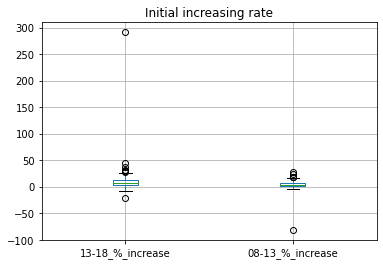

In [5]:
box1 = df.boxplot(column=['13-18_%_increase','08-13_%_increase'])
box1.set_title('Initial increasing rate')

Text(0.5, 1.0, 'Initial case ratio')

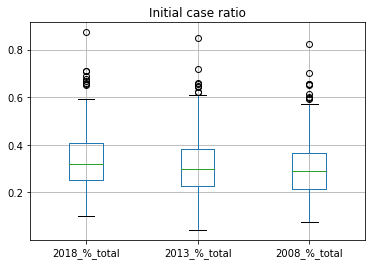

In [6]:
box2 = df.boxplot(column=['2018_%_total','2013_%_total','2008_%_total'])
box2.set_title('Initial case ratio')

In [7]:
x = (df.loc[:,'13-18_%_increase'] < 28) & (df.loc[:, '2013_cases_total'] >50) & (df.loc[:,'13-18_%_increase'] > -20)
df = df.loc[x,:]
x = (df.loc[:,'08-13_%_increase'] < 20) & (df.loc[:, '2008_cases_total'] >50)
df = df.loc[x,:]
print(df.shape)

(142, 34)


In [8]:
x = (df.loc[:, '2008_%_total'] < 0.6) & (df.loc[:, '2008_cases_total'] > 50)
df = df.loc[x, :]
x = (df.loc[:, '2013_%_total'] < 0.62) & (df.loc[:, '2013_cases_total'] > 50)
df = df.loc[x, :]
x = (df.loc[:, '2018_%_total'] < 0.59) & (df.loc[:, '2018_cases_total'] > 50)
df = df.loc[x, :]
print(df.shape)

(132, 34)


Text(0.5, 1.0, 'Processed increasing rate')

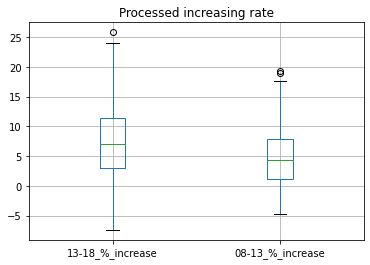

In [9]:
box3 = df.boxplot(column=['13-18_%_increase','08-13_%_increase'])
box3.set_title('Processed increasing rate')

Text(0.5, 1.0, 'Processed case ratio')

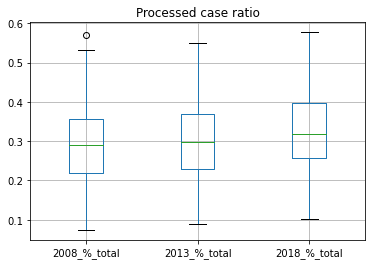

In [10]:
box4 = df.boxplot(column=['2008_%_total','2013_%_total','2018_%_total'])
box4.set_title('Processed case ratio')

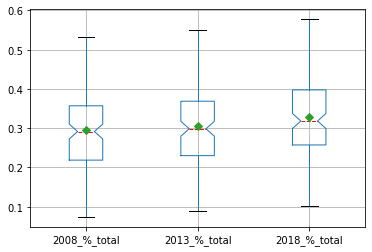

In [11]:
line_box = df.boxplot(column=['2008_%_total','2013_%_total','2018_%_total'],
                      showmeans = True,
                      showfliers = False,
                      notch=True,
                      medianprops = {'linestyle':'--','color':'red'},
                      meanprops = {'marker':'D', 'color':'red'})

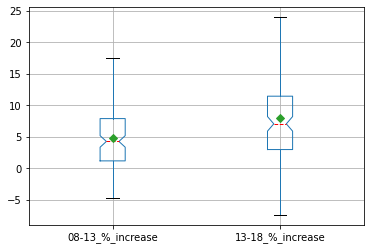

In [12]:
line_box1 = df.boxplot(column=['08-13_%_increase','13-18_%_increase'],
                      showmeans = True,
                      showfliers = False,
                      notch=True,
                      medianprops = {'linestyle':'--','color':'red'},
                      meanprops = {'marker':'D', 'color':'red'})

#df.describe()

Normalization

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
# n_df = df.iloc[:, [19,20,21,22,23,24,25,28,29,30,31,32,33]]
drop_list = ['2008_cases_male','2013_cases_male','2018_cases_male','2008_pop_male','2013_pop_male','2018_pop_male','2008_cases_female','2013_cases_female','2018_cases_female','2008_pop_female','2013_pop_female','2018_pop_female']
n_df = df.drop(['local_authority_area', 'region', 'local_authority_type'], axis=1)
n_df = n_df.drop(drop_list, axis = 1)
n_df = n_df.iloc[:, 6:]
print(n_df.columns.values)
n_columns_name = n_df.columns.values
X_minMax = min_max_scaler.fit_transform(n_df)
npd = pd.DataFrame(X_minMax, columns = n_columns_name)

['total_budget' 'clean_air' 'clean_environ' 'health_training'
 'school_awareness' 'media_awareness' 'sub_counselling' '2008_%_total'
 '2013_%_total' '2018_%_total' '08-13_%_increase' '13-18_%_increase'
 'avg_%_increase']


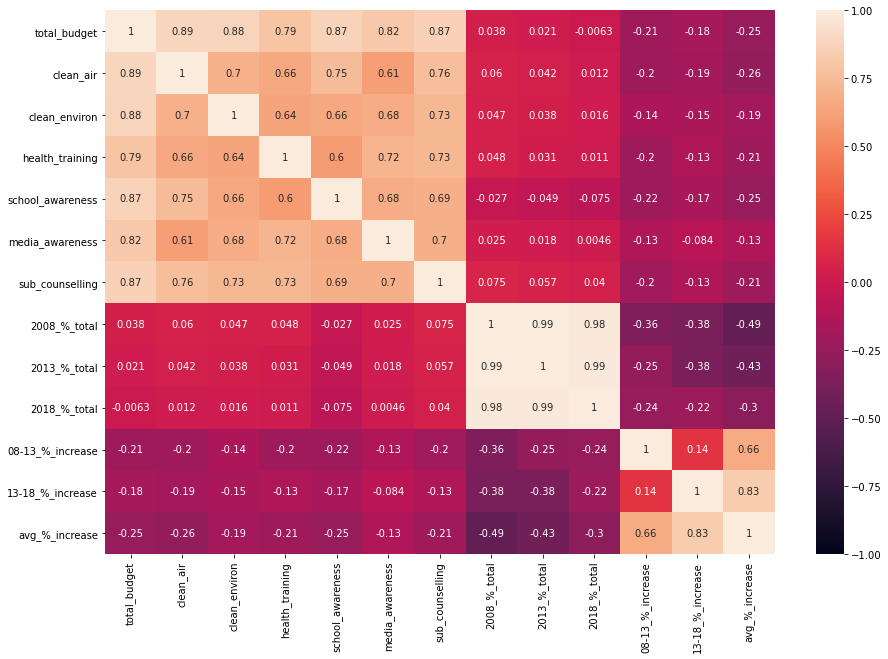

In [14]:
#nn = df.iloc[:, 31:]
fig = plt.figure()
a = npd.corr(method = 'pearson')
hm = sns.heatmap(a, annot=True, vmin=-1, vmax=1)
fig.set_size_inches(15, 10)

可视化

In [15]:
budgetsorted_df = df.sort_values(by='total_budget')
budgetsorted_df['13-18_%_increase'].describe()

count    132.000000
mean       7.951397
std        6.835674
min       -7.396277
25%        2.998553
50%        7.079351
75%       11.471945
max       25.786682
Name: 13-18_%_increase, dtype: float64

clean_air
[-1.86036485e-05  5.92801412e+00]
[-2.38321392e-05  9.43639192e+00]
clean_environ
[-1.1186399e-05  5.5758404e+00]
[-1.61305997e-05  9.11512189e+00]
health_training
[-4.35624789e-05  5.91364465e+00]
[-3.70999144e-05  8.92639388e+00]
school_awareness
[-1.92851763e-05  6.03461835e+00]
[-1.99438841e-05  9.26044091e+00]
media_awareness
[-2.03413467e-05  5.47659591e+00]
[-1.83874775e-05  8.59119752e+00]
sub_counselling
[-4.78433526e-05  5.87428091e+00]
[-4.36547688e-05  8.96008662e+00]


/tmp/ipykernel_1030/3054172538.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(df[i],p(df[i]),"r", label = y, color = c)
/tmp/ipykernel_1030/3054172538.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(df[i],p(df[i]),"r", label = y, color = c)
/tmp/ipykernel_1030/3054172538.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(df[i],p(df[i]),"r", label = y, color = c)
/tmp/ipykernel_1030/3054172538.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plo

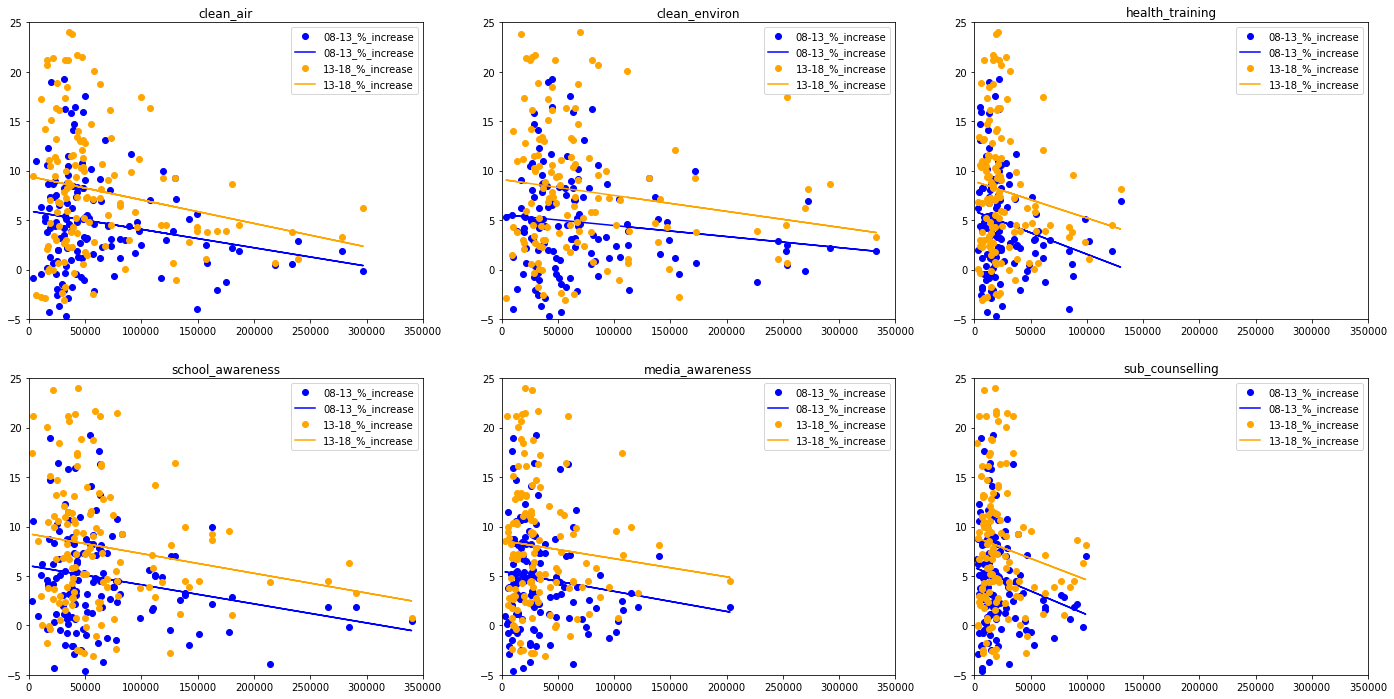

In [18]:
plt.figure(figsize=(24,12))
plt.figure(1)
plot_num = 231
year = ['08-13_%_increase', '13-18_%_increase']
allocation = ['clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling']
color = ['b', 'orange']
axis_lim = [0,350000, -5, 25]
for i in allocation:
    ax = plt.subplot(plot_num)
    ax.axis(axis_lim)
    print(i)
    for inte in range(2):
        y = year[inte]
        c = color[inte]
        ax.plot(df[i], df[y],'o', label = y, color = c) 
        z = np.polyfit(df[i], df[y], 1)
        print(z)
        p = np.poly1d(z) 
        ax.plot(df[i],p(df[i]),"r", label = y, color = c)
        ax.legend()
    ax.set_title(i)
    plot_num = plot_num + 1


/tmp/ipykernel_1030/855335980.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(budgetsorted_df[df['region']==i]['total_budget'],budgetsorted_df[df['region']==i]['13-18_%_increase'], label = f'{i}')


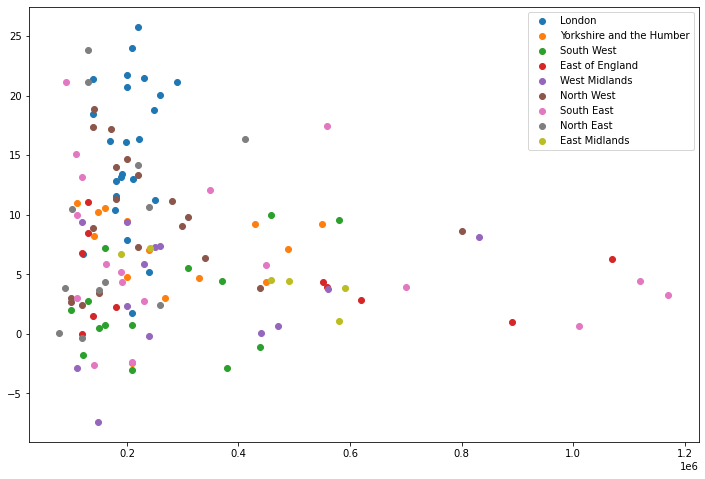

In [19]:
plt.figure(figsize=(12,8))

for i in df['region'].unique():
    plt.scatter(budgetsorted_df[df['region']==i]['total_budget'],budgetsorted_df[df['region']==i]['13-18_%_increase'], label = f'{i}')


plt.legend()

In [21]:
# min_max_scaler = preprocessing.MinMaxScaler()
# # n_df = df[df['region'].str.contains('London')].iloc[:, [29,30,31,32,33,34,35,36,37]]
# # n_df = df.iloc[:, [28,29,30,32,33,34,35]]
# columns_name = n_df.columns.values
# X_minMax = min_max_scaler.fit_transform(n_df)
# npd = pd.DataFrame(X_minMax, columns = columns_name)
# a = npd.corr()
# sns.heatmap(a, annot=True, vmin=-1, vmax=1)

[-4.85584742e-06  6.14919450e+00]
[-5.51766344e-06  9.51991812e+00]


/tmp/ipykernel_1030/1261815099.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  bx.plot(df['total_budget'],p(df['total_budget']),"r", label = '08-13_%_increase', color = 'blue')
/tmp/ipykernel_1030/1261815099.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  bx.plot(df['total_budget'],p(df['total_budget']),"r", label = '13-18_%_increase', color = c)


Text(0.5, 1.0, 'Total budget')

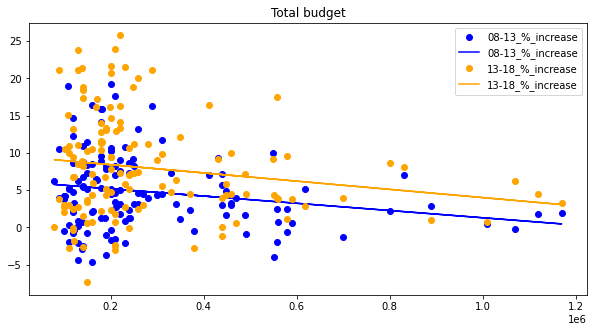

In [22]:
plt.figure(figsize=(10,5))
bx = plt.axes()
bx.figsize=(20,10)
bx.plot(df['total_budget'], df['08-13_%_increase'],'o', label = '08-13_%_increase', color = 'blue') 
z = np.polyfit(df['total_budget'], df['08-13_%_increase'], 1)
print(z)
p = np.poly1d(z)
bx.plot(df['total_budget'],p(df['total_budget']),"r", label = '08-13_%_increase', color = 'blue')
bx.legend()

bx.plot(df['total_budget'], df['13-18_%_increase'],'o', label = '13-18_%_increase', color = c) 
z = np.polyfit(df['total_budget'], df['13-18_%_increase'], 1)
print(z)
p = np.poly1d(z)
bx.plot(df['total_budget'],p(df['total_budget']),"r", label = '13-18_%_increase', color = c)
bx.legend()
bx.set_title('Total budget')
# pylab.plot(df['total_budget'], df[year_increase],'o') 
# z = np.polyfit(df['total_budget'], df[year_increase], 1)
# p = np.poly1d(z) 
# pylab.plot(df['total_budget'],p(df['total_budget']),"r") 

In [23]:
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_%_total,2013_%_total,2018_%_total,08-13_%_increase,13-18_%_increase,avg_%_increase
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough,0.343402,0.345752,0.419740,0.684413,21.399246,11.041830
1,Barnet,539,594,773,340435,344062,355955,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough,0.158327,0.172643,0.217162,9.042343,25.786682,17.414512
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,0.158762,0.184828,0.204356,16.418846,10.565335,13.492090
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority,0.255283,0.243388,0.260915,-4.659779,7.201184,1.270703
4,Bedford,311,327,367,158185,164807,170463,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority,0.196605,0.198414,0.215296,0.919946,8.508520,4.714233


In [65]:
df.head()
region_df = df
X = region_df[['total_budget']]
print(X.shape)
Y = region_df['13-18_%_increase']
#lm = sm.OLS(Y, sm.add_constant(X)).fit()
lm = sm.OLS(Y, X).fit()

# lm = ols(formula='avg_%_increase ~ clean_air + clean_environ + health_training + school_awareness + media_awareness + sub_counselling', data=df).fit()
lm.summary()

(132, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       13-18_%_increase   R-squared (uncentered):                   0.285
Model:                            OLS   Adj. R-squared (uncentered):              0.280
Method:                 Least Squares   F-statistic:                              52.31
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                    3.54e-11
Time:                        01:01:11   Log-Likelihood:                         -475.11
No. Observations:                 132   AIC:                                      952.2
Df Residuals:                     131   BIC:                                      955.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
total_budget  1.564e-05   2.16e-06      7.233      0.000    1.14e-05    1.99e-05
==============================================================================
Omnibus:                        1.517   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.551
Skew:                           0.196   Prob(JB):                        0.461
Kurtosis:                       2.643   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
t_x = region_df.loc[:, ['total_budget', '13-18_%_increase', 'clean_air']]
prediction = lm.predict(t_x)
df['Predict_18-23__%_increase'] = prediction
df.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,2008_%_total,2013_%_total,2018_%_total,08-13_%_increase,13-18_%_increase,avg_%_increase,Predict_18-23__%_increase,Predict_18-23__%_increase_1.1
count,132.000000,132.000000,132.000000,1.320000e+02,1.320000e+02,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02,132.000000,132.000000,132.00000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,1063.651515,1148.325758,1268.606061,3.572838e+05,3.716114e+05,3.868874e+05,370.704545,395.590909,434.787879,174905.734848,180384.310606,186452.568182,692.946970,752.734848,833.818182,182378.022727,191227.068182,200434.840909,2.842727e+05,62310.606061,72143.939394,26280.30303,65636.363636,34795.454545,23106.060606,0.294293,0.306446,0.328118,4.768810,7.951397,6.360103,8.023371,8.317068
std,861.743094,927.970522,1007.654625,2.696824e+05,2.861132e+05,3.027930e+05,302.878222,324.782557,355.057678,132387.856365,139996.923028,149446.444347,566.401785,615.234541,664.577198,137323.365742,146734.643133,154065.683312,2.179143e+05,55464.331785,64383.172209,23588.16963,56933.237013,31172.932729,20685.672873,0.104875,0.104824,0.105611,5.053137,6.835674,4.529573,4.681974,4.705199
min,119.000000,142.000000,156.000000,9.142700e+04,9.619300e+04,9.615100e+04,50.000000,55.000000,51.000000,44854.000000,46835.000000,46775.000000,69.000000,76.000000,91.000000,46573.000000,49358.000000,49376.000000,7.900000e+04,4000.000000,4000.000000,3000.00000,3000.000000,3000.000000,2000.000000,0.074004,0.088066,0.101388,-4.659779,-7.396277,-1.938704,-3.409254,-3.267767
25%,506.500000,556.250000,608.500000,1.916648e+05,2.000078e+05,2.021460e+05,183.750000,191.000000,208.250000,94430.500000,93930.250000,94702.250000,307.500000,343.000000,387.000000,97965.500000,101032.250000,104907.750000,1.470000e+05,28750.000000,32000.000000,13000.00000,34000.000000,14750.000000,10000.000000,0.218686,0.230061,0.257284,1.199608,2.998553,3.113720,4.464940,4.853311
50%,729.000000,815.500000,884.500000,2.559055e+05,2.609170e+05,2.703950e+05,269.000000,276.000000,302.000000,125118.000000,124309.000000,126201.500000,460.500000,538.000000,571.500000,131980.500000,138809.500000,146518.000000,2.050000e+05,43000.000000,51500.000000,19000.00000,48500.000000,26000.000000,16000.000000,0.291452,0.298483,0.318207,4.286677,7.079351,4.987646,7.633969,8.312616
75%,1351.000000,1469.000000,1577.000000,4.328188e+05,4.514550e+05,4.620118e+05,454.000000,513.000000,536.000000,209761.000000,218855.250000,214238.000000,862.500000,943.500000,1022.000000,223057.750000,245240.250000,257889.750000,3.325000e+05,72250.000000,81500.000000,29500.00000,74250.000000,44000.000000,28000.000000,0.356873,0.368520,0.397306,7.915510,11.471945,9.617339,10.895445,11.231755
max,4199.000000,4419.000000,5032.000000,1.411380e+06,1.528154e+06,1.623387e+06,1582.000000,1699.000000,1907.000000,694681.000000,754646.000000,790860.000000,2692.000000,2888.000000,3125.000000,716699.000000,773508.000000,832527.000000,1.170000e+06,297000.000000,333000.000000,130000.00000,340000.000000,203000.000000,99000.000000,0.570175,0.549309,0.576767,19.235037,25.786682,18.725798,19.006402,19.385779


In [ ]:
import sys 
print(sys.version)
print(sys.executable)